Attempt to model 'Zipcode' --> 'Renovate' --> 'Price'

In [291]:
# Import neccesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.offline
import functions

# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

Import FREASH data and quick cleaning

In [292]:
# Import dataframe for King County 

df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/kc_house_data.csv', index_col=0)
#df.set_index(keys=df['id'])
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [293]:
# drop unwanted collumns

df.drop(columns=['date', 'view'],inplace=True)


In [294]:
# take a look at 'yr_renovated'

df['yr_renovated'].value_counts(dropna=False)


0.00       17011
nan         3842
2014.00       73
2003.00       31
2013.00       31
           ...  
1944.00        1
1948.00        1
1976.00        1
1934.00        1
1953.00        1
Name: yr_renovated, Length: 71, dtype: int64

In [295]:
df.loc[df['yr_renovated'] == 0,'yr_renovated'] = np.nan

In [296]:
df['yr_renovated'].value_counts(dropna=False)

nan        20853
2014.00       73
2003.00       31
2013.00       31
2007.00       30
           ...  
1946.00        1
1959.00        1
1971.00        1
1951.00        1
1954.00        1
Name: yr_renovated, Length: 70, dtype: int64

In [297]:
df['yr_renovated'] = df['yr_renovated'].replace(to_replace = np.nan, value = False)
df['yr_renovated']

id
7129300520     False
6414100192   1991.00
5631500400     False
2487200875     False
1954400510     False
               ...  
263000018      False
6600060120     False
1523300141     False
291310100      False
1523300157     False
Name: yr_renovated, Length: 21597, dtype: object

In [298]:
df['yr_renovated'] = df['yr_renovated'].astype(bool)
df['yr_renovated']

id
7129300520    False
6414100192     True
5631500400    False
2487200875    False
1954400510    False
              ...  
263000018     False
6600060120    False
1523300141    False
291310100     False
1523300157    False
Name: yr_renovated, Length: 21597, dtype: bool

In [299]:
df.describe()


price  bedrooms  bathrooms  sqft_living   sqft_lot   floors  \
count   21597.00  21597.00   21597.00     21597.00   21597.00 21597.00   
mean   540296.57      3.37       2.12      2080.32   15099.41     1.49   
std    367368.14      0.93       0.77       918.11   41412.64     0.54   
min     78000.00      1.00       0.50       370.00     520.00     1.00   
25%    322000.00      3.00       1.75      1430.00    5040.00     1.00   
50%    450000.00      3.00       2.25      1910.00    7618.00     1.50   
75%    645000.00      4.00       2.50      2550.00   10685.00     2.00   
max   7700000.00     33.00       8.00     13540.00 1651359.00     3.50   

       sqft_above  yr_built  zipcode      lat     long  sqft_living15  \
count    21597.00  21597.00 21597.00 21597.00 21597.00       21597.00   
mean      1788.60   1971.00 98077.95    47.56  -122.21        1986.62   
std        827.76     29.38    53.51     0.14     0.14         685.23   
min        370.00   1900.00 98001.00    47.16  -122.52         399.00   
25%       1190.00   1951.00 98033.00    47.47  -122.33        1490.00   
50%       1560.00   1975.00 98065.00    47.57  -122.23        1840.00   
75%       2210.00   1997.00 98118.00    47.68  -122.12        2360.00   
max       9410.00   2015.00 98199.00    47.78  -121.31        6210.00   

       sqft_lot15  
count    21597.00  
mean     12758.28  
std      27274.44  
min        651.00  
25%       5100.00  
50%       7620.00  
75%      10083.00  
max     871200.00

In [300]:
df['zipcode'].value_counts(dropna=False)

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [301]:
df['renovated'] = df['yr_renovated'].notna().astype(int)
df['renovated']

id
7129300520    1
6414100192    1
5631500400    1
2487200875    1
1954400510    1
             ..
263000018     1
6600060120    1
1523300141    1
291310100     1
1523300157    1
Name: renovated, Length: 21597, dtype: int64

In [302]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated        bool
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
renovated          int64
dtype: object

In [303]:
df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           1.00      0.31       0.53         0.70      0.09    0.26   
bedrooms        0.31      1.00       0.51         0.58      0.03    0.18   
bathrooms       0.53      0.51       1.00         0.76      0.09    0.50   
sqft_living     0.70      0.58       0.76         1.00      0.17    0.35   
sqft_lot        0.09      0.03       0.09         0.17      1.00   -0.00   
floors          0.26      0.18       0.50         0.35     -0.00    1.00   
sqft_above      0.61      0.48       0.69         0.88      0.18    0.52   
yr_built        0.05      0.16       0.51         0.32      0.05    0.49   
yr_renovated    0.12      0.02       0.05         0.05      0.01    0.00   
zipcode        -0.05     -0.15      -0.20        -0.20     -0.13   -0.06   
lat             0.31     -0.01       0.02         0.05     -0.09    0.05   
long            0.02      0.13       0.22         0.24      0.23    0.13   
sqft_living15   0.59      0.39       0.57         0.76      0.14    0.28   
sqft_lot15      0.08      0.03       0.09         0.18      0.72   -0.01   
renovated        nan       nan        nan          nan       nan     nan   

               sqft_above  yr_built  yr_renovated  zipcode   lat  long  \
price                0.61      0.05          0.12    -0.05  0.31  0.02   
bedrooms             0.48      0.16          0.02    -0.15 -0.01  0.13   
bathrooms            0.69      0.51          0.05    -0.20  0.02  0.22   
sqft_living          0.88      0.32          0.05    -0.20  0.05  0.24   
sqft_lot             0.18      0.05          0.01    -0.13 -0.09  0.23   
floors               0.52      0.49          0.00    -0.06  0.05  0.13   
sqft_above           1.00      0.42          0.02    -0.26 -0.00  0.34   
yr_built             0.42      1.00         -0.20    -0.35 -0.15  0.41   
yr_renovated         0.02     -0.20          1.00     0.06  0.03 -0.06   
zipcode             -0.26     -0.35          0.06     1.00  0.27 -0.56   
lat                 -0.00     -0.15          0.03     0.27  1.00 -0.14   
long                 0.34      0.41         -0.06    -0.56 -0.14  1.00   
sqft_living15        0.73      0.33          0.00    -0.28  0.05  0.34   
sqft_lot15           0.20      0.07          0.00    -0.15 -0.09  0.26   
renovated             nan       nan           nan      nan   nan   nan   

               sqft_living15  sqft_lot15  renovated  
price                   0.59        0.08        nan  
bedrooms                0.39        0.03        nan  
bathrooms               0.57        0.09        nan  
sqft_living             0.76        0.18        nan  
sqft_lot                0.14        0.72        nan  
floors                  0.28       -0.01        nan  
sqft_above              0.73        0.20        nan  
yr_built                0.33        0.07        nan  
yr_renovated            0.00        0.00        nan  
zipcode                -0.28       -0.15        nan  
lat                     0.05       -0.09        nan  
long                    0.34        0.26        nan  
sqft_living15           1.00        0.18        nan  
sqft_lot15              0.18        1.00        nan  
renovated                nan         nan        nan

In [304]:
X = df[['renovated', 'sqft_above']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     9201.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:08:11   Log-Likelihood:            -2.2671e+05
No. Observations:               16197   AIC:                         4.534e+05
Df Residuals:                   16195   BIC:                         4.534e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
renovated   6.572e+04   5425.570     12.113      0.000    5.51e+04    7.64e+04
sqft_above   264.1135      2.753     95.923      0.000     258.717     269.510
==============================================================================
Omnibus:                    13098.703   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           750386.754
Skew:                           3.475   Prob(JB):                         0.00
Kurtosis:                      35.613   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [305]:
train_preds = model.predict(sm.add_constant(X_train))
test_preds = model.predict(sm.add_constant(X_test))
functions.evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.3623
Test R2: 0.3771
****
Train RMSE: $290,132.03
Test RMSE: $299,219.94
****
Train MAE: $189,890.06
Test MAE: $194,650.28


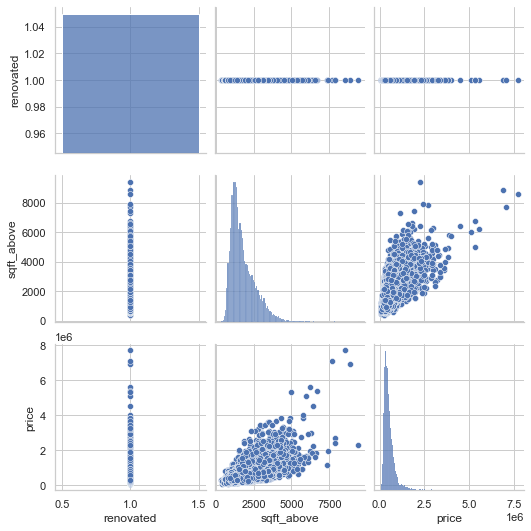

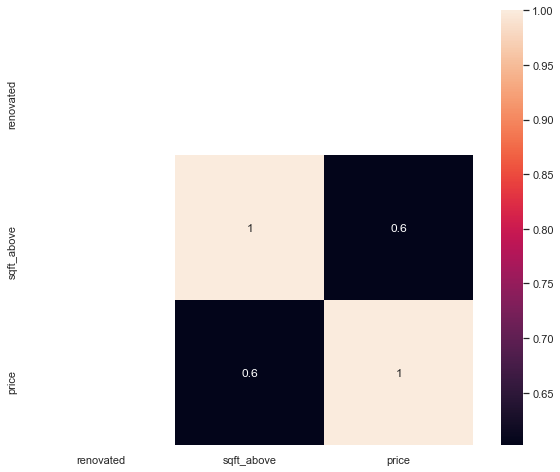

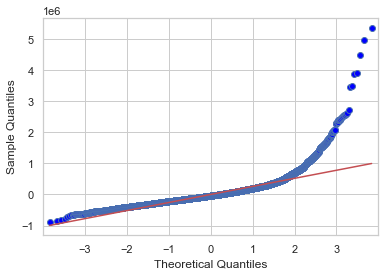

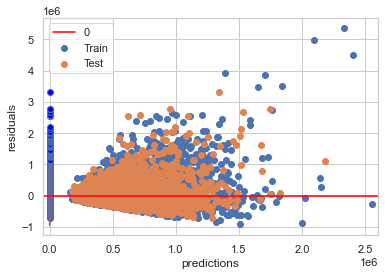

In [306]:
functions.check_assumptions(X_train, y_train, train_preds, test_preds, y_test)

In [307]:
group = df.groupby(['zipcode'])['price'].mean()
top_5_zip = group.sort_values(ascending=False)



#print(top_5_zip)


# grouping zipcode with long and lat
#loc_df = df[['price', 'zipcode', 'long', 'lat']]
#loc_df

#drop_df = top_5_zip.combine(loc_df, on='zipcode'

In [308]:
fig = px.scatter_mapbox(df,
                        lat='lat',
                        lon='long',
                        color='zipcode',
                        zoom=8)
fig.update_layout(mapbox_style='open-street-map')

fig.show()

In [309]:
# getting ride of extreme outliners

# remove outliners from price
Q1 = df['price'].quantile(0.0001)
Q3 = df['price'].quantile(0.99)


df = df[df['price'] > Q1]
df = df[df['price'] < Q3]

In [310]:
# Turn the 'Condition" collumn to integers

df['condition'].replace({ 'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}, inplace=True)
df['condition'].describe()

count   21377.00
mean        3.41
std         0.65
min         1.00
25%         3.00
50%         3.00
75%         4.00
max         5.00
Name: condition, dtype: float64

In [311]:
# Average price of home renovated vs. not renovated

is_renovated = df.loc[df['yr_renovated'] == True]
isnt_renovated = df.loc[df['yr_renovated'] == False]

In [312]:
isnt_renovated_sum = isnt_renovated['price'].sum()
is_renovated_sum = is_renovated['price'].sum()

isnt_renovated_mean = isnt_renovated['price'].mean()
is_renovated_mean = is_renovated['price'].mean()

#isnt_renovated['zipcode_sum'] = isnt_renovated.groupby(['zipcode'])['price'].sum()
#is_renovated['zipcode_sum'] = is_renovated.groupby(['zipcode'])['price'].sum()


#is_renovated = is_renovated.reset_index()
#isnt_renovated = isnt_renovated.reset_index()

In [313]:
print(isnt_renovated_sum)

10589513090.0


In [314]:
isnt_renovated.shape

(20660, 19)

In [332]:
# map for house renovated 


fig = px.scatter_mapbox(is_renovated, hover_name="zipcode", hover_data=["price"],
                        lat='lat',
                        lon='long',
                        color='price',
                         
                        size = 'price',
                        size_max=10,
                        color_continuous_scale=px.colors.sequential.Jet,
                        zoom=10,
                        title='Price of renovated Houses')
                        #px.colors.sequential.matter
fig.update_layout(mapbox_style='open-street-map')

plotly.offline.plot(fig, filename='/Users/stephen/Flatiron/Phase2/Project2/visuals/renovated')

fig.show()


In [331]:
# map for house renovated 


fig = px.scatter_mapbox(isnt_renovated, hover_name="zipcode", hover_data=["price"],
                        lat='lat',
                        lon='long',
                        color='price',
                        
                        size = 'price',
                        color_continuous_scale=px.colors.sequential.Jet,
                        #range_color = [10000000,10000],
                        size_max=10,
                        zoom=10,
                        title='Price of none-renovated Houses')
fig.update_layout(mapbox_style='open-street-map')

plotly.offline.plot(fig, filename='/Users/stephen/Flatiron/Phase2/Project2/visuals/none_renovated')

fig.show()

/Users/stephen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `/Users/stephen/Flatiron/Phase2/Project2/visuals/none_renovated` didn't end with .html. Adding .html to the end of your file.



Conclusion


In [333]:
# Print out Results


#print('Print there are " is_renovated.shape[0] "renovated Houses with an  )
print("The combined price of none-renovated houses is " + str(isnt_renovated_sum) + " with an average of " + str(isnt_renovated_mean) + " per home")
print("The combined price of renovated houses is " + str(is_renovated_sum) + " with an average of " + str(is_renovated_mean) + " per home")

The combined price of none-renovated houses is 10589513090.0 with an average of 512561.13697967085 per home
The combined price of renovated houses is 491493008.0 with an average of 685485.3668061367 per home


In [318]:
rX = df[['zipcode', 'renovated', 'sqft_above', 'condition']]
ry = df['price']

rX_train, rX_test, ry_train, ry_test = train_test_split(
    rX, ry, test_size=0.25)

rmodel = sm.OLS(ry_train, sm.add_constant(rX_train)).fit()
rmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     3120.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:08:16   Log-Likelihood:            -2.2030e+05
No. Observations:               16032   AIC:                         4.406e+05
Df Residuals:                   16028   BIC:                         4.406e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
zipcode      725.8468     34.391     21.106      0.000     658.437     793.256
renovated  -7.129e+07   3.37e+06    -21.127      0.000   -7.79e+07   -6.47e+07
sqft_above   228.9914      2.375     96.419      0.000     224.336     233.647
condition   6.349e+04   2766.509     22.950      0.000    5.81e+04    6.89e+04
==============================================================================
Omnibus:                     4469.573   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15242.012
Skew:                           1.395   Prob(JB):                         0.00
Kurtosis:                       6.878   Cond. No.                     1.87e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [326]:
train_preds = model.predict(sm.add_constant(X_train))
test_preds = model.predict(sm.add_constant(X_test))
functions.evaluate(y_train, train_preds, y_test, test_preds)

Train R2: 0.3623
Test R2: 0.3771
****
Train RMSE: $290,132.03
Test RMSE: $299,219.94
****
Train MAE: $189,890.06
Test MAE: $194,650.28


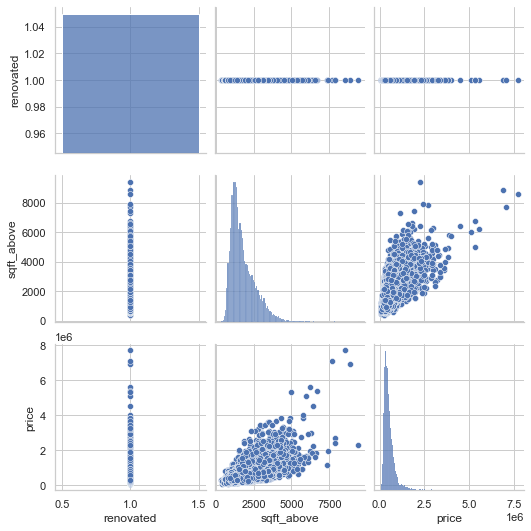

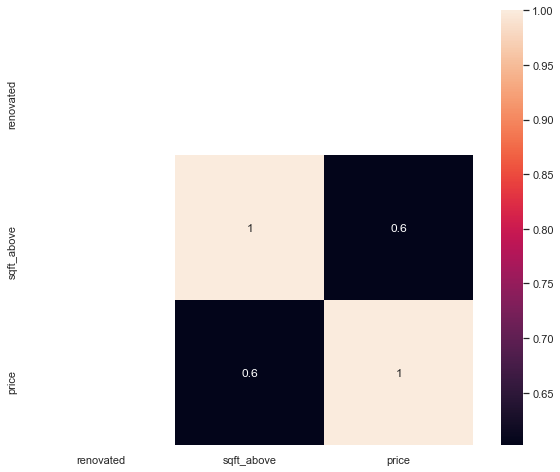

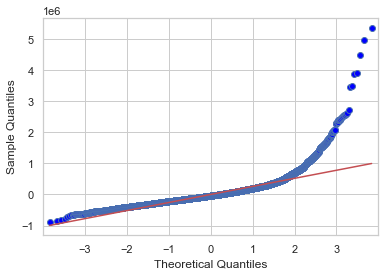

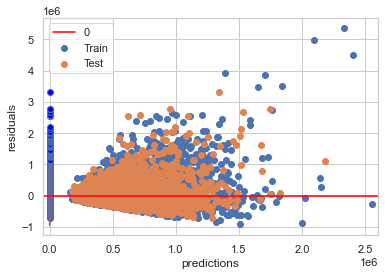

In [327]:
functions.check_assumptions(X_train, y_train, train_preds, test_preds, y_test)